# National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset

**Name**: `Amrisha` `Zafreen`

**PRN**: `230200001`

**Subject**: `Machine` `Learning`

**Topic**: Binary Classification

**Aprroach**: Logistic Regression

**Dataset**: https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

# Phase 1:

*    Download the dataset, read it into Dataframe and perform descriptive statistics.
*   Perform the baseline experiment on a 80-20 split both with and without Standard Scaling.
*   Logistic/Softmax Regression, show the Confusion Matrix, and report Precision, Recall, and the F1-Score



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("NHANES_age_prediction.csv")
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
X = df.drop(columns=["age_group"]).values  # Drop target column to get features (works)
y = df["age_group"].values  # Select target column

In [ ]:
print(X)

[[7.3564e+04 6.1000e+01 2.0000e+00 ... 2.0000e+00 1.5000e+02 1.4910e+01]
 [7.3568e+04 2.6000e+01 2.0000e+00 ... 2.0000e+00 8.0000e+01 3.8500e+00]
 [7.3576e+04 1.6000e+01 1.0000e+00 ... 2.0000e+00 6.8000e+01 6.1400e+00]
 ...
 [8.3713e+04 3.4000e+01 1.0000e+00 ... 2.0000e+00 1.2400e+02 2.1410e+01]
 [8.3718e+04 6.0000e+01 2.0000e+00 ... 2.0000e+00 1.0800e+02 4.9900e+00]
 [8.3727e+04 2.6000e+01 1.0000e+00 ... 2.0000e+00 1.0800e+02 3.7600e+00]]


In [ ]:
print(y)

['Adult' 'Adult' 'Adult' ... 'Adult' 'Adult' 'Adult']


In [ ]:
print(df.columns)

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')


In [ ]:
print(df.dtypes)

SEQN         float64
age_group     object
RIDAGEYR     float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
dtype: object


# Descriptive statistics on the dataset:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


In [ ]:
print(df.describe())

               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365151    20.156111     0.499979     0.398918     7.248962   
min    73564.000000    12.000000     1.000000     1.000000    14.500000   
25%    76171.750000    24.000000     1.000000     2.000000    22.800000   
50%    78749.000000    41.000000     2.000000     2.000000    26.800000   
75%    81213.500000    58.000000     2.000000     2.000000    31.200000   
max    83727.000000    80.000000     2.000000     7.000000    70.100000   

            LBXGLU       DIQ010       LBXGLT        LBXIN  
count  2278.000000  2278.000000  2278.000000  2278.000000  
mean     99.553117     2.016242   114.978929    11.834794  
std      17.889834     0.185556    47.061239     9.718812  
min      63.000000     1.000000    40.000000     0.140000  
25%      91.000000     2

In [ ]:
print(df.columns)

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')


In [ ]:
print(df['age_group'].unique())  # See the actual unique values
print(df['age_group'].dtype)  # Check the data type

['Adult' 'Senior']
object


# Convertion of non-numeric labels into numeric:

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['age_group'] = df['age_group'].astype(str)
le = LabelEncoder()
y = le.fit_transform(df['age_group'])

print(le.classes_)  # Check the categories
print(y)  # Print encoded values


['Adult' 'Senior']
[0 0 0 ... 0 0 0]


In [ ]:
print(le.classes_)

['Adult' 'Senior']


# Splitting data into 80% train and 20% test:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
print(f'Number of samples and attributes: {X_train.shape}')

Number of samples and attributes: (1822, 9)


In [ ]:
print(f'Number of samples and attributes: {X_test.shape}')

Number of samples and attributes: (456, 9)


In [ ]:
print(X_train.shape)
print(y_train.shape)


(1822, 9)
(1822,)


In [ ]:
print("Class 0 samples:", X_train[y_train == 0].shape)
print("Class 1 samples:", X_train[y_train == 1].shape)


Class 0 samples: (1531, 9)
Class 1 samples: (291, 9)


# Data Visualisation:

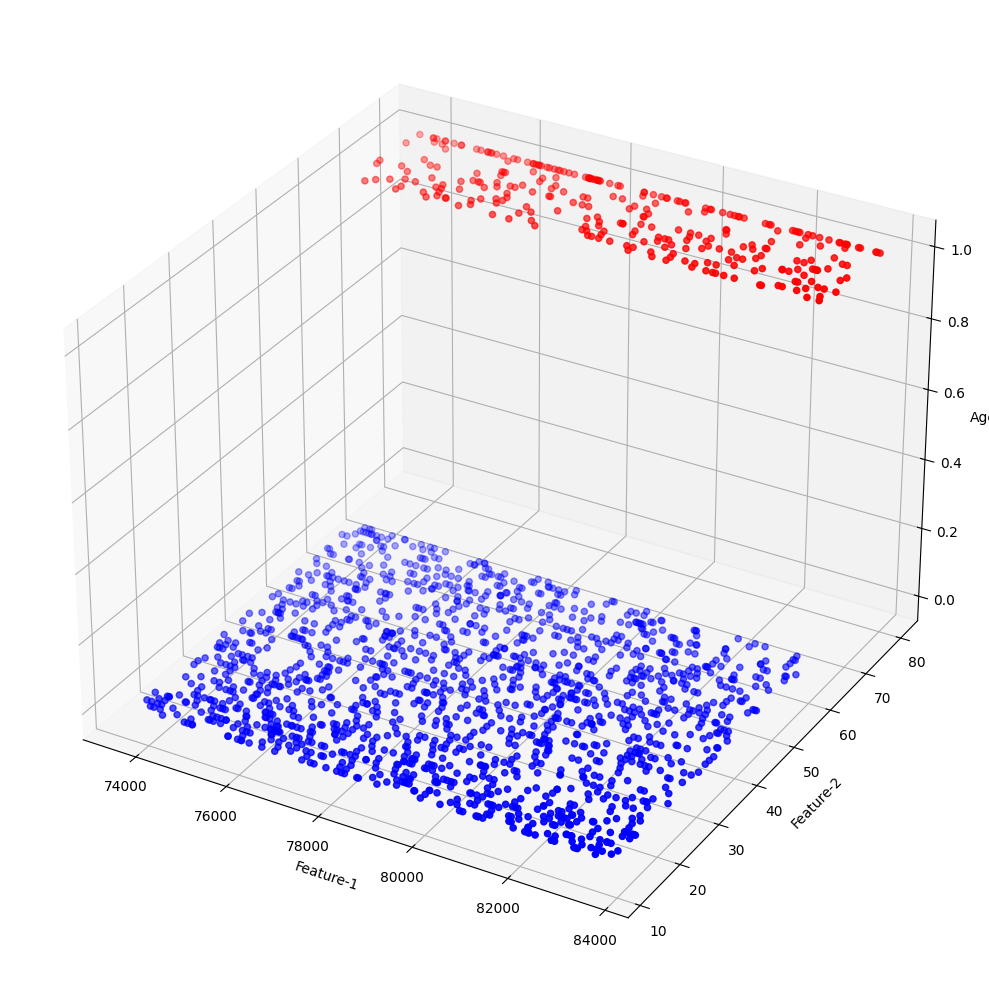

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("Feature-1")
ax.set_ylabel("Feature-2")
ax.set_zlabel("Age")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)

X_train_2D_pca = pca2.transform(X_train)

print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')

PCA Features: Number of samples and attributes: (1822, 2)


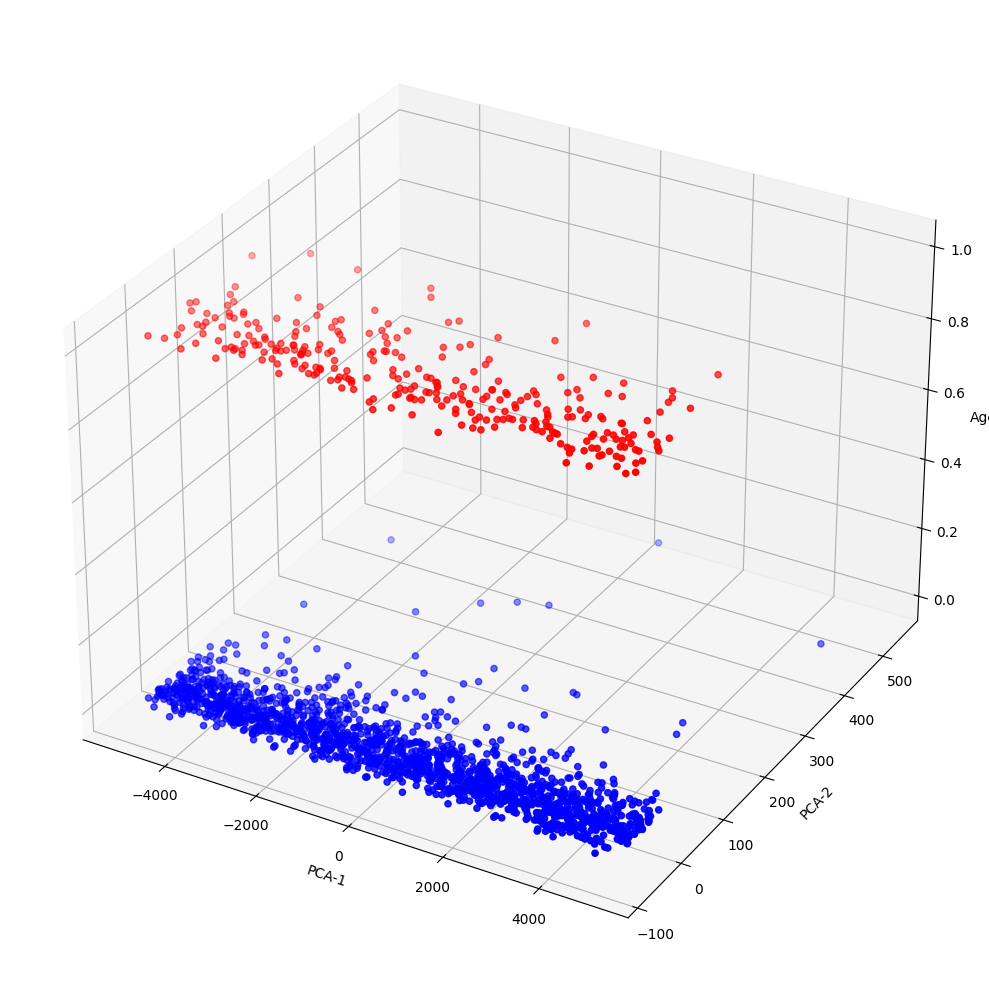

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[y_train==0, 0], X_train_2D_pca[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_pca[y_train==1, 0], X_train_2D_pca[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Age")

plt.tight_layout()
plt.show()

# Performing losgistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
score = lr_clf.score(X_test, y_test)
print(f'Classification accuray using raw data is {score}%')

Classification accuray using raw data is 0.9868421052631579%


# Apply standard scaling and check the performance of the model:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf_std = LogisticRegression()
lr_clf_std.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
score_std = lr_clf_std.score(X_test_std, y_test)

print(f'Classification accuray after feature scaling is {score_std}%')

print(f'Classification accuray using raw data is {score}%')

Classification accuray after feature scaling is 0.993421052631579%
Classification accuray using raw data is 0.9868421052631579%


# Seeing the values predicted by model:

In [ ]:
y_pred = lr_clf_std.predict(X_test_std)
print(y_pred)

[0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0]


In [ ]:
print(y_test)

[0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0]


# Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confMatrix)

[[383   0]
 [  3  70]]


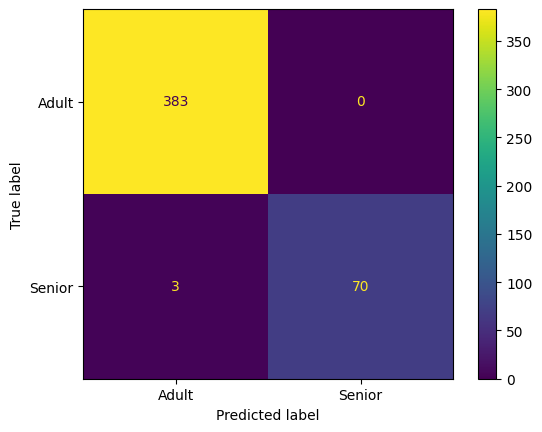

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix,
                              display_labels=le.classes_)

disp.plot()
plt.show()

# Precision, Recall, and F1 score:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Precision: 1.000
Recall: 0.959
F1: 0.979


# Checking CV Score:

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(lr_clf_std, X_train_std, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: %.3f" % np.mean(cv_scores))
print("Standard deviation: %.3f" % np.std(cv_scores))


Cross-validation scores: [0.9890411  0.9890411  0.97802198 0.99725275 1.        ]
Mean CV accuracy: 0.991
Standard deviation: 0.008


# Phase 2:


*   SVM with the following kernels - linear, polynomial and RBF.
*   Decision Trees - use the max_depth as 4 and report the performance.



# SVM with Linear Kernel (its confusion matrix), Precision, Recall and FI Score:

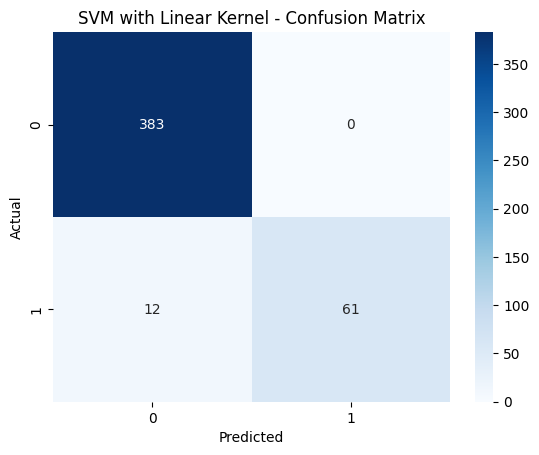

Classification Report for SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       383
           1       1.00      0.84      0.91        73

    accuracy                           0.97       456
   macro avg       0.98      0.92      0.95       456
weighted avg       0.97      0.97      0.97       456



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('SVM with Linear Kernel - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report for SVM (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))


In [ ]:
from sklearn.metrics import classification_report

report_linear = classification_report(y_test, y_pred_linear, output_dict=True)

print("🔹 SVM (Linear Kernel):")
print(f"Precision: {report_linear['weighted avg']['precision']:.4f}")
print(f"Recall:    {report_linear['weighted avg']['recall']:.4f}")
print(f"F1-Score:  {report_linear['weighted avg']['f1-score']:.4f}")


🔹 SVM (Linear Kernel):
Precision: 0.9745
Recall:    0.9737
F1-Score:  0.9727


# SVM with Polynomial Kernel (its confusion matrix), Precision, Recall and FI Score:

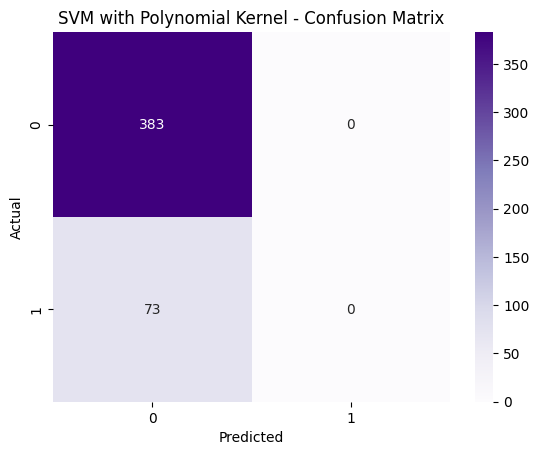

Classification Report for SVM (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       383
           1       0.00      0.00      0.00        73

    accuracy                           0.84       456
   macro avg       0.42      0.50      0.46       456
weighted avg       0.71      0.84      0.77       456



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
poly_svm = SVC(kernel='poly', degree=3)  # You can change degree if needed
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

cm_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Purples')
plt.title('SVM with Polynomial Kernel - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report for SVM (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))


In [ ]:
report_poly = classification_report(y_test, y_pred_poly, output_dict=True)

print("🔹 SVM (Polynomial Kernel):")
print(f"Precision: {report_poly['weighted avg']['precision']:.4f}")
print(f"Recall:    {report_poly['weighted avg']['recall']:.4f}")
print(f"F1-Score:  {report_poly['weighted avg']['f1-score']:.4f}")


🔹 SVM (Polynomial Kernel):
Precision: 0.7055
Recall:    0.8399
F1-Score:  0.7668


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM with RBF Kernel (its confusion matrix), Precision, Recall and FI Score:

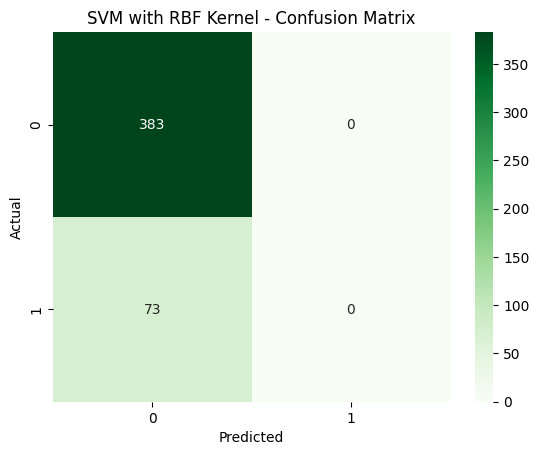

Classification Report for SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       383
           1       0.00      0.00      0.00        73

    accuracy                           0.84       456
   macro avg       0.42      0.50      0.46       456
weighted avg       0.71      0.84      0.77       456



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens')
plt.title('SVM with RBF Kernel - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report for SVM (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))


In [ ]:
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)

print("🔹 SVM (RBF Kernel):")
print(f"Precision: {report_rbf['weighted avg']['precision']:.4f}")
print(f"Recall:    {report_rbf['weighted avg']['recall']:.4f}")
print(f"F1-Score:  {report_rbf['weighted avg']['f1-score']:.4f}")


🔹 SVM (RBF Kernel):
Precision: 0.7055
Recall:    0.8399
F1-Score:  0.7668


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Trees with max_depth as 4 and its performance:

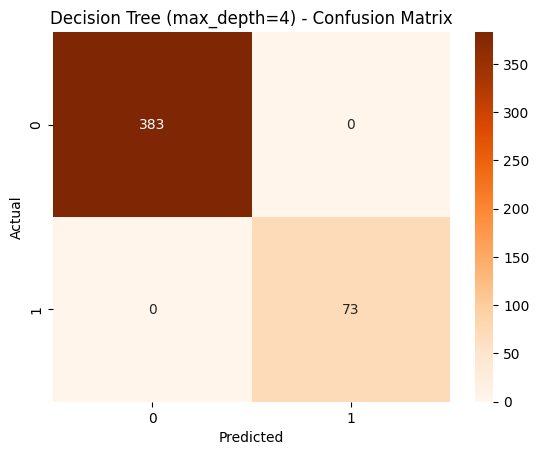

Classification Report for Decision Tree (max_depth=4):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00        73

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

# Initialize Decision Tree with max_depth=4
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree (max_depth=4) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for the decision tree
print("Classification Report for Decision Tree (max_depth=4):")
print(classification_report(y_test, y_pred_tree))


In [ ]:
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

print("Decision Tree (max_depth=4):")
print(f"Precision: {report_tree['weighted avg']['precision']:.4f}")
print(f"Recall:    {report_tree['weighted avg']['recall']:.4f}")
print(f"F1-Score:  {report_tree['weighted avg']['f1-score']:.4f}")


Decision Tree (max_depth=4):
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
